In [1]:
# Importing necessary Librraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
data = pd.read_csv('IMDb Movies India.csv',encoding='latin-1')

In [3]:
data.head() # Displays the first 5 rows in the Dataset

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
data.tail() # Displays last 5 rows in the Dataset

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [5]:
data.shape # Displays the number of rows and columns in the dataset

(15509, 10)

In [6]:
# Gives information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [7]:
data.isna().sum() # Checking null values

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

There are many null values in our dataset

In [8]:
data.dropna(inplace = True) # Deleting null values in the dataset

In [9]:
data.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [10]:
# Displays the statistical information
data.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


In [15]:
director = data["Director"].value_counts()
director

David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         33
Hrishikesh Mukherjee    33
Shakti Samanta          33
                        ..
Sriram Raja              1
Randeep Jha              1
Vicky Bhardwaj           1
Salar Shaikh             1
Mozez Singh              1
Name: Director, Length: 2431, dtype: int64

In [16]:
movie_name_rating =data[['Name','Rating']]
movie_name_rating

,Name,Rating
1,#Gadhvi (He thought he was Gandhi),7.0
3,#Yaaram,4.4
5,...Aur Pyaar Ho Gaya,4.7
6,...Yahaan,7.4
8,?: A Question Mark,5.6
...,...,...
15493,Zubaan,6.1
15494,Zubeidaa,6.2
15503,Zulm Ki Zanjeer,5.8
15505,Zulmi,4.5


DATA VISUALIZATIONS

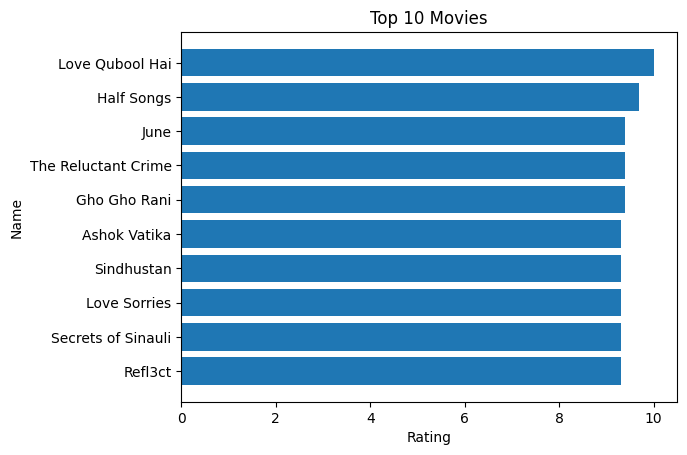

In [17]:
# Displays top 10 Movies in our Dataset
top_10_movies = data.sort_values(by = 'Rating',ascending=False).head(10)
plt.barh(top_10_movies['Name'],top_10_movies['Rating'])
plt.xlabel('Rating')
plt.ylabel('Name')
plt.title('Top 10 Movies')
plt.gca().invert_yaxis()
plt.show()

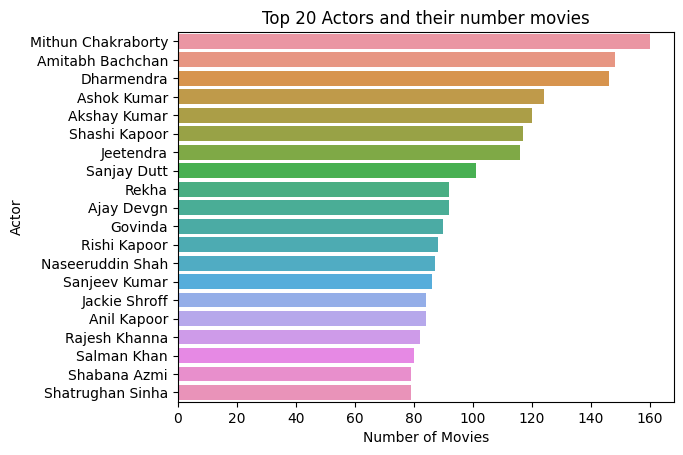

In [19]:
# Displays  top 20 actors in our dataset
actors = pd.concat([data['Actor 1'], data['Actor 2'], data['Actor 3']])
actor_counts = actors.value_counts().reset_index()
actor_counts.columns = ['Actor', 'Number of Movies']
sns.barplot(x = 'Number of Movies', y = 'Actor', data = actor_counts.head(20))
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.title('Top 20 Actors and their number movies')
plt.show()

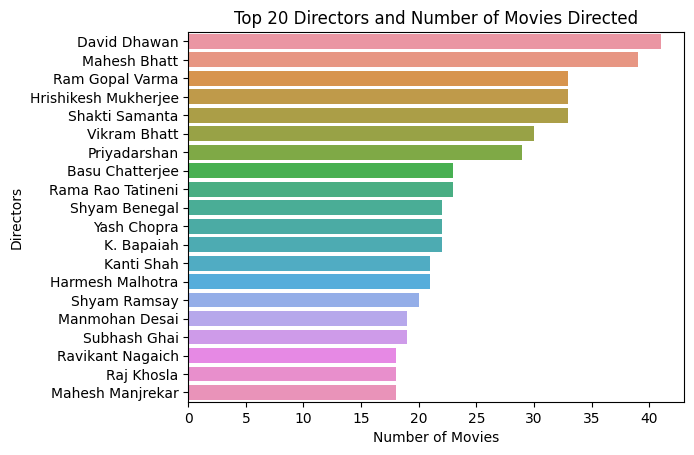

In [20]:
# Displays top 20 Directors
ax = sns.barplot(y=director.head(20).index, x=director.head(20).values)
ax.set_ylabel('Directors')
ax.set_xlabel('Number of Movies')
ax.set_title('Top 20 Directors and Number of Movies Directed')
plt.show()

Text(0.5, 1.0, 'Total Number of Movies in Year')

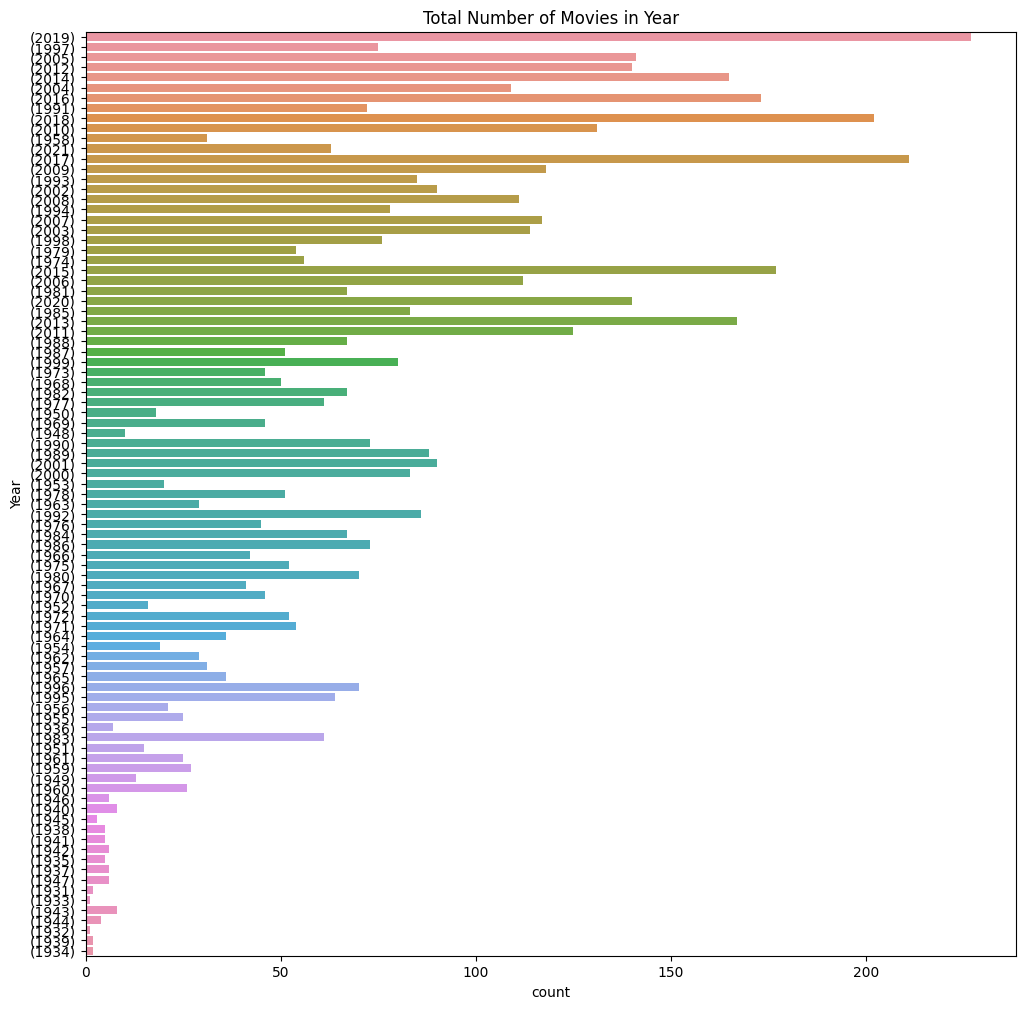

In [21]:
# Gives information about the highest number of movies in year
fig, ax = plt.subplots()
fig.set_size_inches(12,12)
sns.countplot(y='Year', data=data, ax =ax)
plt.title('Total Number of Movies in Year')

In [22]:
data['Year'] = data['Year'].astype(str)
data['Duration']= data['Duration'].astype(str)
data['Votes']= data['Votes'].astype(str)

In [23]:
data['Year'] = data['Year'].str.extract('(\d+)').astype(float)
data['Duration'] = data['Duration'].str.extract('(\d+)').astype(float)
data['Votes'] = data['Votes'].str.extract('(\d+)').astype(float).replace(",", "")

In [24]:
# Dividing x any y parameters
X = data[['Year', 'Duration', 'Votes']]
y = data['Rating']

In [25]:
print(X)

         Year  Duration  Votes
1      2019.0     109.0    8.0
3      2019.0     110.0   35.0
5      1997.0     147.0  827.0
6      2005.0     142.0    1.0
8      2012.0      82.0  326.0
...       ...       ...    ...
15493  2015.0     115.0  408.0
15494  2001.0     153.0    1.0
15503  1989.0     125.0   44.0
15505  1999.0     129.0  655.0
15508  1998.0     130.0   20.0

[5659 rows x 3 columns]


In [26]:
print(y)

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15493    6.1
15494    6.2
15503    5.8
15505    4.5
15508    6.2
Name: Rating, Length: 5659, dtype: float64


In [27]:
# Splitting data for Training and Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state = 42)

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3961, 3)
(3961,)
(1698, 3)
(1698,)


In [29]:
# Model selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [31]:
# predictions
lr_predict = lr_model.predict(X_test)

In [32]:
mae = mean_absolute_error(y_test, lr_predict)
rse = mean_squared_error(y_test, lr_predict, squared = False)
r2 = r2_score(y_test, lr_predict)
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rse}")
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error: 1.071199580925008
Root Mean Squared Error: 1.3279421104518647
R-squared (R2) Score: 0.03739359091993355
